# Standard Imports

In [1]:
import os
import json
from pathlib import Path
from IPython.display import display, Image
from dotenv import load_dotenv

# OpenAI & ChromaDB - Embedding + Vector Store
import openai
import chromadb

# LandingAI SDK
from agentic_doc.parse import parse
from agentic_doc.utils import viz_parsed_document

2025-08-03 16:07:13 [info   ] Settings loaded: {
  "endpoint_host": "https://api.va.landing.ai",
  "vision_agent_api_key": "dzhra[REDACTED]",
  "batch_size": 4,
  "max_workers": 5,
  "max_retries": 100,
  "max_retry_wait_time": 60,
  "retry_logging_style": "log_msg",
  "pdf_to_image_dpi": 96,
  "split_size": 10,
  "extraction_split_size": 50
} [agentic_doc.config] (config.py:170)


---

# Configuration

In [4]:
# Setting Directories and Paths
DOC_PATH = "apple_10k.pdf"
OUTPUT_DIR = "./ade_outputs"
GROUNDING_DIR = f"{OUTPUT_DIR}/grounding"
ADE_JSON_PATH = f"{OUTPUT_DIR}/apple_10k.json"
ADE_MD_PATH = f"{OUTPUT_DIR}/apple_10k.md"

# Load API keys from .env
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

---

# Chunk Normalization Function

In [6]:
def normalize_chunk(chunk):
    """Convert PosixPath objects in chunk dict to plain strings for JSON storage."""
    normalized = {}
    for k, v in chunk.items():
        if isinstance(v, Path):
            normalized[k] = str(v)
        elif isinstance(v, list):
            normalized[k] = [
                normalize_chunk(i) if isinstance(i, dict) else (str(i) if isinstance(i, Path) else i)
                for i in v
            ]
        elif isinstance(v, dict):
            normalized[k] = normalize_chunk(v)
        else:
            normalized[k] = v
    return normalized

---

# LandingAI - Agentic Document Extraction 10K Parsing

In [8]:
# LandingAI Python Library for Document Parsing & Saving Chunk Images
results = parse(DOC_PATH, grounding_save_dir=GROUNDING_DIR)
parsed_doc = results[0]

# Normalize Chunks into JSON-Safe Format
normalized_chunks = [normalize_chunk(c.dict()) for c in parsed_doc.chunks]

# Save Normalized Chunks
with open(ADE_JSON_PATH, "w") as f:
    json.dump(normalized_chunks, f, indent=2)

# Save Markdown Output
with open(ADE_MD_PATH, "w") as f:
    f.write(parsed_doc.markdown)

# Save Visualization Images with Bounding Boxes
images = viz_parsed_document(DOC_PATH, parsed_doc, output_dir=OUTPUT_DIR)

print(f"""
Parsing + Visualization Complete ✅
- Markdown: {ADE_MD_PATH}
- JSON: {ADE_JSON_PATH}
- Page bounding box visualizations: {len(images)} images saved in {OUTPUT_DIR}
- Grounding crops: saved in {GROUNDING_DIR}
""")

2025-08-03 16:07:21 [info   ] API key is valid.              [agentic_doc.utils] (utils.py:42)
2025-08-03 16:07:21 [info   ] Parsing 1 documents            [agentic_doc.parse] (parse.py:280)
2025-08-03 16:07:21 [info   ] Splitting PDF: 'apple_10k.pdf' into 7 parts under '/var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8' [agentic_doc.utils] (utils.py:236)


Parsing documents:   0%|                                  | 0/1 [00:00<?, ?it/s]

2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/apple_10k_1.pdf [agentic_doc.utils] (utils.py:252)
2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/apple_10k_2.pdf [agentic_doc.utils] (utils.py:252)
2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/apple_10k_3.pdf [agentic_doc.utils] (utils.py:252)
2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/apple_10k_4.pdf [agentic_doc.utils] (utils.py:252)
2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/apple_10k_5.pdf [agentic_doc.utils] (utils.py:252)
2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/apple_10k_6.pdf [agentic_doc.utils] (utils.py:252)
2025-08-03 16:07:21 [info   ] Created /var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/tmp1_h65je8/a


Parsing document parts from 'apple_10k.pdf':   0%|        | 0/8 [00:00<?, ?it/s]

2025-08-03 16:07:21 [info   ] Start parsing document part: 'File name: apple_10k_4.pdf	Page: [30:39]' [agentic_doc.parse] (parse.py:670)


2025-08-03 16:07:21 [info   ] Start parsing document part: 'File name: apple_10k_5.pdf	Page: [40:49]' [agentic_doc.parse] (parse.py:670)
HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:07:38 [info   ] Time taken to successfully parse a document chunk: 17.04 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:07:38 [info   ] Successfully parsed document part: 'File name: apple_10k_3.pdf	Page: [20:29]' [agentic_doc.parse] (parse.py:679)
2025-08-03 16:07:38 [info   ] Start parsing document part: 'File name: apple_10k_6.pdf	Page: [50:59]' [agentic_doc.parse] (parse.py:670)
HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:07:39 [info   ] Time taken to successfully parse a document chunk: 17.17 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:07:39 [info   ] Successfully parsed document part: 'File name: apple_10k_2.pd


Parsing document parts from 'apple_10k.pdf':  12%|▏| 1/8 [00:19<02:17, 19.65s/it

HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:07:48 [info   ] Time taken to successfully parse a document chunk: 26.85 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:07:48 [info   ] Successfully parsed document part: 'File name: apple_10k_4.pdf	Page: [30:39]' [agentic_doc.parse] (parse.py:679)



Parsing document parts from 'apple_10k.pdf':  50%|▌| 4/8 [00:26<00:22,  5.67s/it

HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:07:57 [info   ] Time taken to successfully parse a document chunk: 35.42 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:07:57 [info   ] Successfully parsed document part: 'File name: apple_10k_5.pdf	Page: [40:49]' [agentic_doc.parse] (parse.py:679)



Parsing document parts from 'apple_10k.pdf':  62%|▋| 5/8 [00:35<00:19,  6.47s/it

HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:07:57 [info   ] Time taken to successfully parse a document chunk: 18.51 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:07:57 [info   ] Successfully parsed document part: 'File name: apple_10k_6.pdf	Page: [50:59]' [agentic_doc.parse] (parse.py:679)



Parsing document parts from 'apple_10k.pdf':  75%|▊| 6/8 [00:35<00:09,  4.67s/it

HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:08:14 [info   ] Time taken to successfully parse a document chunk: 33.48 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:08:14 [info   ] Successfully parsed document part: 'File name: apple_10k_8.pdf	Page: [70:73]' [agentic_doc.parse] (parse.py:679)
HTTP Request: POST https://api.va.landing.ai/v1/tools/agentic-document-analysis "HTTP/1.1 200 OK" (_client.py:1025)
2025-08-03 16:08:16 [info   ] Time taken to successfully parse a document chunk: 37.70 seconds [agentic_doc.parse] (parse.py:823)
2025-08-03 16:08:16 [info   ] Successfully parsed document part: 'File name: apple_10k_7.pdf	Page: [60:69]' [agentic_doc.parse] (parse.py:679)



Parsing document parts from 'apple_10k.pdf': 100%|█| 8/8 [00:54<00:00,  6.86s/it

2025-08-03 16:08:16 [info   ] Saving 458 chunks as images to 'ade_outputs/grounding/apple_10k_20250803_160816' [agentic_doc.utils] file_path=PosixPath('apple_10k.pdf') file_type=pdf (utils.py:82)



Parsing documents: 100%|██████████████████████████| 1/1 [00:55<00:00, 55.59s/it]

2025-08-03 16:08:17 [info   ] Visualizing parsed document of: 'apple_10k.pdf' [agentic_doc.utils] (utils.py:305)



/var/folders/_0/xg_50ybj0bs8yjqd5wjj40h40000gn/T/ipykernel_33550/2857715197.py:5: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  normalized_chunks = [normalize_chunk(c.dict()) for c in parsed_doc.chunks]



Parsing + Visualization Complete ✅
- Markdown: ./ade_outputs/apple_10k.md
- JSON: ./ade_outputs/apple_10k.json
- Page bounding box visualizations: 74 images saved in ./ade_outputs
- Grounding crops: saved in ./ade_outputs/grounding



---

# Chroma Initialization (Persistent Vector Store)

In [10]:
# Instantiate the Chroma Client
chroma_client = chromadb.PersistentClient(path="./chroma_db")

# Create or Load ADE Collection
collection = chroma_client.get_or_create_collection(name="ade_documents")

Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information. (posthog.py:22)


---

# Insert ADE Chunks into Chroma

In [12]:
for chunk in normalized_chunks:
    text = chunk["text"]
    chunk_id = chunk["chunk_id"]
    grounding = chunk.get("grounding", [])

    # Flatten Metadata (Simple Types Only)
    metadata = {
        "chunk_type": chunk["chunk_type"],
        "page": grounding[0]["page"] if grounding else None,
        "image_path": grounding[0].get("image_path") if grounding and "image_path" in grounding[0] else None
    }

    # Generate Embeddings with OpenAI
    emb = openai.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    ).data[0].embedding

    # Store in Chroma
    collection.add(
        documents=[text],
        ids=[chunk_id],
        metadatas=[metadata],
        embeddings=[emb]
    )

print(f"Inserted {len(normalized_chunks)} chunks into Chroma with flat metadata ✅")

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_clie

---

# RAG Query Function & Visualization

In [14]:
def rag_query(question, top_k=3, threshold=0.25):
    """
    Query the ADE Chroma index with a natural language question.
    
    Args:
        question (str): User query
        top_k (int): Max results to return
        threshold (float): Minimum similarity (1 - distance)
    """
    # 1. Embed Query
    q_embed = openai.embeddings.create(
        model="text-embedding-3-small",
        input=question
    ).data[0].embedding

    # 2. Query Chroma
    results = collection.query(
        query_embeddings=[q_embed],
        n_results=top_k,
        include=["documents", "metadatas", "distances"]
    )

    print(f"\n🔎 Query: {question}\n")

    # 3. Parse Results
    retrieved_docs   = results["documents"][0]
    retrieved_meta   = results["metadatas"][0]
    retrieved_dists  = results["distances"][0]
    retrieved_ids    = results["ids"][0]

    found_any = False
    for i, (doc, meta, dist, cid) in enumerate(zip(
        retrieved_docs, retrieved_meta, retrieved_dists, retrieved_ids
    )):
        similarity = 1 - dist
        if similarity < threshold:
            continue  # Skip Weak Matches

        found_any = True
        print(f"Result {i+1} (score={similarity:.3f}): {doc[:160]}...")
        print(f"Chunk ID: {cid}")
        print(f"Chunk Type: {meta.get('chunk_type')}, Page: {meta.get('page')}")
        
        # Visualize Grounding Crop (If It Exists)
        img_path = meta.get("image_path")
        if img_path and os.path.exists(img_path):
            print(f"Grounding available → {img_path}")
            display(Image(filename=img_path))
        else:
            print("No grounding crop available")

        print("-" * 80)

    if not found_any:
        print("No results above similarity threshold.")

---

# Example RAG Query (Local)

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK" (_client.py:1025)

🔎 Query: What was Apple’s net sales in 2023?

Result 1 (score=0.480): Net sales disaggregated by significant products and services for 2023, 2022 and 2021 were as follows (in millions):
<table><thead><tr><th></th><th>2023</th><th>...
Chunk ID: 8153133b-df10-4b9a-8cb5-7d034cc41076
Chunk Type: table, Page: 46
No grounding crop available
--------------------------------------------------------------------------------
Result 2 (score=0.480): Net sales disaggregated by significant products and services for 2023, 2022 and 2021 were as follows (in millions):
<table><thead><tr><th></th><th>2023</th><th>...
Chunk ID: e5de7089-d786-4d77-b78e-c9c80e34ad00
Chunk Type: table, Page: 46
Grounding available → ade_outputs/grounding/apple_10k_20250803_160816/page_46/ChunkType.table_e5de7089-d786-4d77-b78e-c9c80e34ad00_0.png


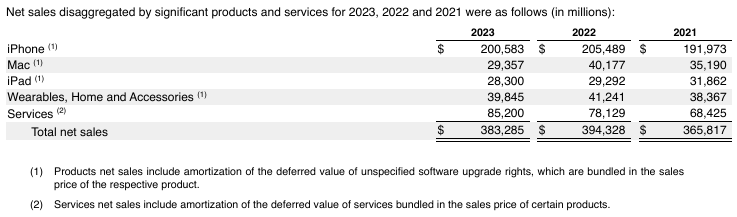

--------------------------------------------------------------------------------
Result 3 (score=0.380): *Americas*

Americas net sales decreased 4% or $7.1 billion during 2023 compared to 2022 due to lower net sales of iPhone and Mac, partially offset by higher ne...
Chunk ID: dcec30b7-f2cf-4ab8-814d-80acc500ca9e
Chunk Type: text, Page: 31
No grounding crop available
--------------------------------------------------------------------------------
Result 4 (score=0.380): *Americas*

Americas net sales decreased 4% or $7.1 billion during 2023 compared to 2022 due to lower net sales of iPhone and Mac, partially offset by higher ne...
Chunk ID: 6c63432a-ea6e-4534-8f9b-7ed138095d8b
Chunk Type: text, Page: 31
Grounding available → ade_outputs/grounding/apple_10k_20250803_160816/page_31/ChunkType.text_6c63432a-ea6e-4534-8f9b-7ed138095d8b_0.png


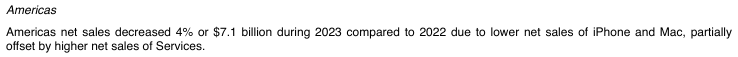

--------------------------------------------------------------------------------
Result 5 (score=0.378): *Mac*
Mac net sales decreased 27% or $10.8 billion during 2023 compared to 2022 due primarily to lower net sales of laptops....
Chunk ID: 39a047e7-b3a9-45d3-af75-1b755602d8b1
Chunk Type: text, Page: 32
No grounding crop available
--------------------------------------------------------------------------------


In [18]:
# Pass in Question in Natural Language, Top_K, and Threhold/Cosine Distance
rag_query("What was Apple’s net sales in 2023?", top_k=5, threshold=0.32)